In [15]:
#Import dataset
import pickle as p
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plimg
from PIL import Image
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb')as f:
        datadict = p.load(f,encoding='latin1')
        #print(datadict.keys())
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32)
        Y = np.array(Y)
        return X, Y

X1,Y1=load_CIFAR_batch('data_batch_1')
X2,Y2=load_CIFAR_batch('data_batch_2')
X3,Y3=load_CIFAR_batch('data_batch_3')
X4,Y4=load_CIFAR_batch('data_batch_4')
X5,Y5=load_CIFAR_batch('data_batch_5')
X_test,Y_test=load_CIFAR_batch('test_batch')
X=np.vstack((X1,X2,X3,X4,X5)).reshape(50000,3072)
X=X/255
Y=np.hstack((Y1,Y2,Y3,Y4,Y5)).reshape((50000,1))
X_test=X_test/255
X_test=X_test.reshape(10000,3072)
from sklearn.preprocessing import OneHotEncoder
# convert the 10 classes to one hot encoding
one_hot = OneHotEncoder()
y_train = one_hot.fit_transform(Y.reshape(-1,1)).toarray()
y_test = one_hot.fit_transform(Y_test.reshape(-1,1)).toarray()
print(np.shape(y_train))

(50000, 10)


In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense

network_model = Sequential()
network_model.add(Dense(3000, activation='sigmoid'))
network_model.add(Dense(1000,activation='relu'))
network_model.add(Dense(10, activation='softmax'))

network_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=network_model.fit(X,y_train,batch_size=500,epochs=100,validation_data=(X_test, y_test))

Epoch 1/100
100/100 [==============================] - 23s 234ms/step - loss: 2.4664 - accuracy: 0.2139 - val_loss: 1.9213 - val_accuracy: 0.3025
Epoch 2/100
100/100 [==============================] - 22s 219ms/step - loss: 1.8391 - accuracy: 0.3434 - val_loss: 1.7566 - val_accuracy: 0.3744
Epoch 3/100
100/100 [==============================] - 23s 233ms/step - loss: 1.7297 - accuracy: 0.3822 - val_loss: 1.6797 - val_accuracy: 0.4038
Epoch 4/100
100/100 [==============================] - 22s 218ms/step - loss: 1.6519 - accuracy: 0.4116 - val_loss: 1.6219 - val_accuracy: 0.4235
Epoch 5/100
100/100 [==============================] - 21s 212ms/step - loss: 1.5956 - accuracy: 0.4293 - val_loss: 1.5698 - val_accuracy: 0.4443
Epoch 6/100
100/100 [==============================] - 22s 216ms/step - loss: 1.5491 - accuracy: 0.4478 - val_loss: 1.5784 - val_accuracy: 0.4344
Epoch 7/100
100/100 [==============================] - 22s 222ms/step - loss: 1.5217 - accuracy: 0.4567 - val_loss: 1.5006 -

In [19]:
from sklearn.metrics import classification_report

# compute the accuracy and print a classification report
label_tra=network_model.predict(X)
label_test=network_model.predict(X_test)
label_name=['0','1','2','3','4','5','6','7','8','9']

pred_tra,pred_test=np.zeros(50000),np.zeros(10000)
for i in range(50000):
    pred_tra[i]=np.argmax(label_tra[i])
for j in range(10000):
    pred_test[j]=np.argmax(label_test[j])
print(classification_report(Y, pred_tra, target_names=label_name))
print(classification_report(Y_test, pred_test, target_names=label_name))
print('test error rate:',np.mean(pred_test!=Y_test))


              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5000
           1       1.00      0.98      0.99      5000
           2       0.90      0.92      0.91      5000
           3       0.96      0.91      0.93      5000
           4       0.94      0.89      0.91      5000
           5       0.95      0.95      0.95      5000
           6       0.94      0.98      0.96      5000
           7       0.93      0.99      0.96      5000
           8       0.94      0.98      0.96      5000
           9       0.99      0.97      0.98      5000

    accuracy                           0.95     50000
   macro avg       0.95      0.95      0.95     50000
weighted avg       0.95      0.95      0.95     50000

              precision    recall  f1-score   support

           0       0.65      0.56      0.60      1000
           1       0.66      0.58      0.62      1000
           2       0.41      0.42      0.42      1000
           3       0.35 

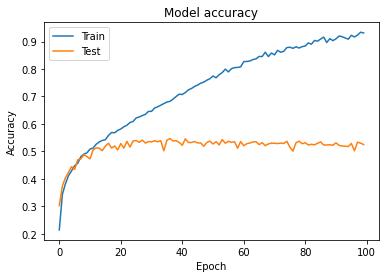

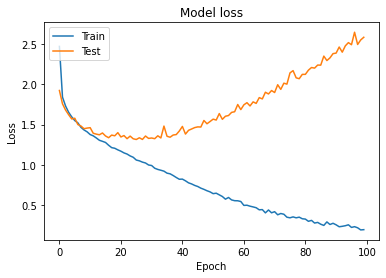

In [20]:
#plot training and test accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot training and test loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()